# Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#1
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#only 10 out of 100 features are informative, add some noise to add to the difficulty of the problem
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=50, n_informative=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#perform Ridge regression
#plot training and validation errors as function of lambda
#also plot coefficients and coefficients error as function of lambda
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)
#interpret what is happening

In [3]:
#2
#implement Linear regression from scratch using 
#- the closed form OLS
#- the gradient descent
#- (optional challenge) the closed form OLS using pseudo inverse
#- LinearRegression() by sklearn. - please research which algorithm that sklearn use?
#measure which one is faster, try to vary the n_features
#so what do you think, closed_form or gradient descent?
#use the same X y from #1

In [4]:
#3
#implement Ridge regression from scratch using 
# - the closed form OLS
# - stochastic gradient descent
# - SGDRegressor() of sklearn using penalty as l2
# - Ridge() by sklearn
#loop through several lambda and print the MSE
#compare the time as well
#use the same X y from #1

# Solution

'\nFor big lambdas, coefficients are moving to "near" zero (but not zero!), forcing the model\nto be a simpler version.  \n\nFor the right graph, expectedly, once lambdas is big,\nthe difference between original coefficient and new coefficient will be big\n\nFor MSE, it shares the same info as coefficients error.  The sweet spot seems to be values\nbefore 10e-2 before strongly regularized model suffers from underfittig since the \ncoefficients are too small.\n\n'

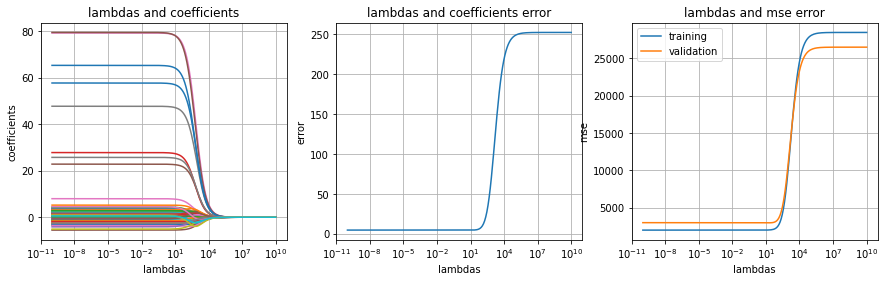

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

coefs = []
coefs_errors = []
train_errors = []
validation_errors = []

lambs = np.logspace(-10, 10, 200)

#loop through
for lamb in lambs:
    model = Ridge(alpha = lamb)
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, pred))
    pred = model.predict(X_test)
    validation_errors.append(mean_squared_error(y_test, pred))
    coefs.append(model.coef_)
    coefs_errors.append(mean_squared_error(model.coef_, coef))
    
# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].grid()
ax[0].plot(lambs, coefs)
ax[0].set_xscale('log')
ax[0].set_xlabel('lambdas')
ax[0].set_ylabel('coefficients')
ax[0].set_title('lambdas and coefficients')

ax[1].grid()
ax[1].plot(lambs, coefs_errors)
ax[1].set_xscale('log')
ax[1].set_xlabel('lambdas')
ax[1].set_ylabel('error')
ax[1].set_title('lambdas and coefficients error')

ax[2].grid()
ax[2].plot(lambs, train_errors, label="training")
ax[2].plot(lambs, validation_errors, label="validation")
ax[2].set_xscale('log')
ax[2].set_xlabel('lambdas')
ax[2].set_ylabel('mse')
ax[2].set_title('lambdas and mse error')
ax[2].legend()

'''
For big lambdas, coefficients are moving to "near" zero (but not zero!), forcing the model
to be a simpler version.  

For the right graph, expectedly, once lambdas is big,
the difference between original coefficient and new coefficient will be big

For MSE, it shares the same info as coefficients error.  The sweet spot seems to be values
before 10e-2 before strongly regularized model suffers from underfittig since the 
coefficients are too small.

'''

In [6]:
#2
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from time import time
from sklearn.linear_model import LinearRegression

def linear_regression_ols(X, y, num_feature, pseudo=False):
    X = X[:, :num_feature]
    
    #traditional OLS
    #remember that OLS has the assumption of full-column rank
    #which means the number of samples should be greater than number of features
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
   
    #another way using pseudo-inverse (robust if matrix violates full-column rank)
    if(pseudo):
        #many ways to perform dot such as np.dot....you can also use @!
        w = np.dot(np.linalg.pinv(X), y)
    return w
    
def linear_regression_gradient(X, y, num_feature, max_iter=10, tol=0.0001):
    X = X[:, :num_feature]
    w = np.zeros(X.shape[1]) #+1 for intercept
    
    m = len(y)
    l_rate = 0.01 #actually need adaptive learning rate
    
    #good question is how many iteration
    #perhaps you can set a variable called tol
    #and if the mse falls in some range, its ok
    for i in range(max_iter):
        pred = get_pred(X, w)
        if (mean_squared_error(y, pred) < tol):
            break
        error = pred - y
        
        #update w by minus its partial derivates
        #if you do not add 1 for intercept, you have to do like this
#         w[0] = w[0] - ((l_rate * 1/m) * error.sum())  #remember to set w np.zeros(X.shape[1] + 1)
#         w[1:] = w[1:] - ((l_rate * 1/m) * np.dot(X.T, error))
        w = w - ((l_rate * 1/m) * np.dot(X.T, error))
    return w, i

def get_pred(X, w):
    return X @ w

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

test_num_feature = np.linspace(1, X.shape[1], 5, dtype=int)

#you probably want to write as class for below code
#way too many boiler code!
print("===Gradient Descent===")
for num_feature in test_num_feature: 
    start = time()
    w, i = linear_regression_gradient(X_train, y_train, num_feature=num_feature, max_iter=2000)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {i+1} iteration and {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")

print("===OLS===")
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")
    
print("===OLS using pseudo-inverse==")
#I found pseudo-inverse to work much better than ols when full-rank assumption is violated
#for example, try make X with n_features more than n_samples...
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature, pseudo=True)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")
    
print("===OLS using sklearn LinearRegression==")
#I found pseudo-inverse to work much better than ols when full-rank assumption is violated
#for example, try make X with n_features more than n_samples...
for num_feature in test_num_feature: 
    start = time()
    model = LinearRegression().fit(X_train[:, :num_feature], y_train)
    pred = model.predict(X_test[:, :num_feature])
    print(f"Results finish using {num_feature} features with MSE of " +
            f"{mean_squared_error(y_test, pred)}" + 
            f" using time of {time() - start}")
    
'''
Several interesting points can be said here.

It is clear to me that OLS performs much faster, since OLS solves it with one go.  In addition, closed form always 
perform with with highest accuracy (even overfitting) given that closed form
solves the equation directly, aiming for highest accuracy (i.e., highest variance).  However, this does not mean
Gradient Descent is not accurate since you can keep on running loops on Gradient Descent and reach the same MSE
eventually.  But I think the key here is that closed form performs much faster than Gradient Descent.

Note that all algorithms cap at MSE of 2995 regardless of algorithms.  This is likely because this is the best
these linear models can perform given the noise and n_informative features.

You also never want to use Gradient Descent since the better one is Stochastic Gradient Descent in most situations,
since Stochastic Descent used only one sample at a time to estimate the udpate, thus reduce the
computational complexity (of course, we gonna implement that in the next question!).  SGD will show its power
especially when working on large datasets.  However, since SGD randomize sample everytime, the update
can go awry sometimes and MSE tend to be bigger

There are two situations you want to use descent algorithms over closed form:
- When your X matrix cannot meet OLS assumption, e.g., a lot of zeros thus cannot be inversed, or not full-column rank
- The complexity of inversing a matrix is roughly O(n^3) where n is dimension or number of features.  Here
  we use n = 100 but seems like closed_form still outperform in terms of time.  I do not have powerful
  machine yet on my hand, but theoretically, at certain very large n, descent algorithm "may" be faster.  You can 
  try more n_features but be careful your pc will take long long long time :)

It is also good to mention that closed form is not possible for Lasso (except for univarate linear regression - 
i.e., with one x).  Thus Lasso in sklearn implements coordinate descent which updates only one wi (for example,
w associating with x1) at a time, whereas gradient descent shall update the whole w for all x every iteration.
More readings: https://www.ias.ac.in/public/Volumes/reso/023/04/0439-0464.pdf
'''

===Gradient Descent===
Results finish using 2000 iteration and 1 features with MSE of 26499.61154417147 using time of 0.37444400787353516
Results finish using 2000 iteration and 25 features with MSE of 26094.695828550426 using time of 0.4766089916229248
Results finish using 2000 iteration and 50 features with MSE of 23948.4215315859 using time of 0.514739990234375
Results finish using 2000 iteration and 75 features with MSE of 18191.764932892846 using time of 0.5286939144134521
Results finish using 2000 iteration and 100 features with MSE of 2995.535226898777 using time of 0.536060094833374
===OLS===
Results finish using 1 features with MSE of 26499.61154452976 using time of 0.0006051063537597656
Results finish using 25 features with MSE of 26094.696592451037 using time of 0.0008339881896972656
Results finish using 50 features with MSE of 23948.424486768836 using time of 0.0008099079132080078
Results finish using 75 features with MSE of 18191.871747952748 using time of 0.00101304054260

'\nSeveral interesting points can be said here.\n\nIt is clear to me that OLS performs much faster, since OLS solves it with one go.  In addition, closed form always \nperform with with highest accuracy (even overfitting) given that closed form\nsolves the equation directly, aiming for highest accuracy (i.e., highest variance).  However, this does not mean\nGradient Descent is not accurate since you can keep on running loops on Gradient Descent and reach the same MSE\neventually.  But I think the key here is that closed form performs much faster than Gradient Descent.\n\nNote that all algorithms cap at MSE of 2926 regardless of algorithms.  This is likely because this is the best\nthese linear models can perform given the noise and n_informative features.\n\nYou also never want to use Gradient Descent since the better one is Stochastic Gradient Descent in most situations,\nsince Stochastic Descent used only one sample at a time to estimate the udpate, thus reduce the\ncomputational com

'\nIt is clear to me that OLS (OLS and sklearn-Ridge) again performs much faster and accurate that both Descent algorithm.  \nNote that our custom SGD algorithm takes much more time than sklearn SGD, probably because sklearn has some optimization, or\nour SGD implementation is under optimized!\n\nIt is also clear to see that sklearn SGD performs much faster than our GD algorithm as expected.  However,\nthere is never free thing exists in the world, so SGD is less robust to increase in MSE.\n\nYou only want to use SGD over closed form when your matrix does not meet OLS assumptions or you have \nway too many features.  Note that there is no closed-form soution for Lasso, so sklearn implement something\ncalled coordinate descent instead.\n\nOne last thing but probably the most important, Ridge regression outperform LinearRegression in MSE.  Given\nappropriate lambda, Ridge MSE approach zero for both validation and training errors.  Ridge was\nable to shine here since we select n_informati

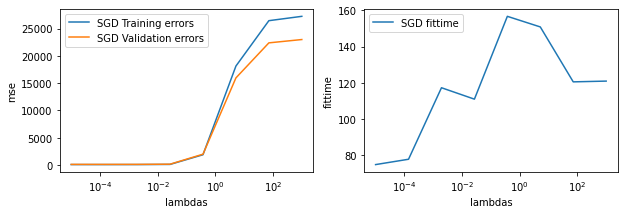

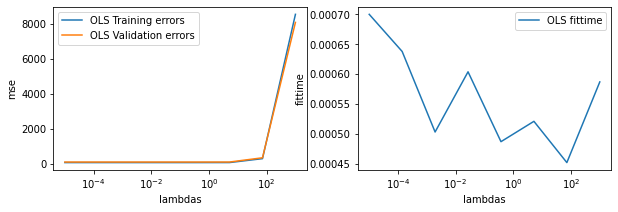

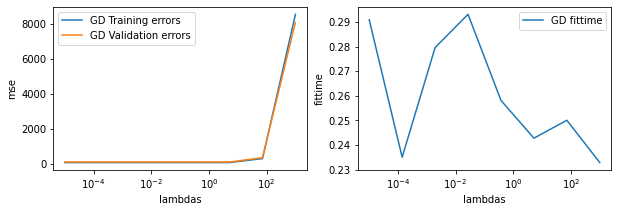

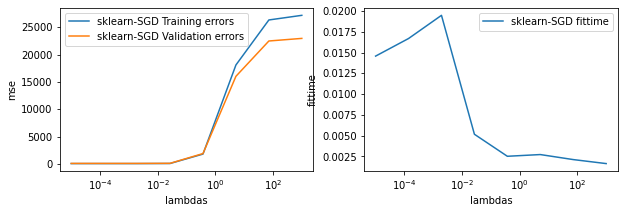

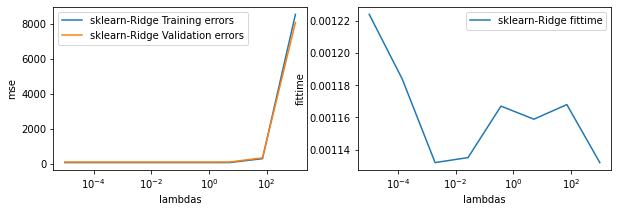

In [7]:
#3
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import mean_squared_error

def get_pred(X, w):
    return X @ w

def ridge_ols(X, y, lamb):
    # Get identity matrix
    I = np.eye(X.shape[1])
    
    # Set up equations (X^T dot X + lambda * I) dot w = X^T dot y        
    # Solve for w
    # use @ for dot, for easier readability...if you like
    w = np.linalg.solve((X.T @ X) + lamb * I, X.T @ y)
    return w

def ridge_sgd(X, y, lamb, max_iter=1000, tol=0.001):
    w = np.zeros(X.shape[1])
    m = len(y)  #or X.shape[0]
    l_rate = 0.01
    for i in range(max_iter):
        for j in range(X.shape[0]):  #get only some rows
            random_row_to_pick = np.random.randint(0, X.shape[0])
            X_i = X[random_row_to_pick, :].reshape(1, X_train.shape[1])
            y_i = y[[random_row_to_pick]] #shape (n, )
            pred = get_pred(X_i, w)
            if (mean_squared_error(y_i, pred) < tol):
                break
            error = pred - y_i
            w = w - (l_rate / m) * (np.dot(X_i.T, error) + lamb * w)
    return w

def ridge_gd(X, y, lamb, max_iter=1000, tol=0.001):
    w = np.zeros(X.shape[1])
    m = len(y)  #or X.shape[0]
    l_rate = 0.01
    for i in range(max_iter):
        pred = get_pred(X, w)
        if (mean_squared_error(y, pred) < tol):
            break
        error = pred - y
        w = w - (l_rate / m) * (np.dot(X.T, error) + lamb * w)
    return w

def plot_lambdas_mse(lambs, training_errors, validation_errors, fittime, modifier="OLS"):
    _, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].plot(lambs, training_errors, label=f"{modifier} Training errors")
    ax[0].plot(lambs, validation_errors, label=f"{modifier} Validation errors")
    ax[0].set_xscale('log')
    ax[0].set_xlabel("lambdas")
    ax[0].set_ylabel("mse")
    ax[0].legend()
    ax[1].plot(lambs, fittime, label=f"{modifier} fittime")
    ax[1].set_xscale('log')
    ax[1].set_xlabel("lambdas")
    ax[1].set_ylabel("fittime")
    ax[1].legend()

#decided to write this to avoid all these boiler codes!
def apply(X_train, X_test, y_train, y_test, lamb, modifier, use_sklearn, f):
    lambs = np.logspace(-5, 3, 8)
    training_errors = []
    validation_errors = []
    fittime = []
    
    for lamb in lambs: 
        start = time()
        if not (use_sklearn):
            w = f(X_train, y_train, lamb)
            fittime.append(time() - start)
            pred = get_pred(X_train, w)
            training_errors.append(mean_squared_error(y_train, pred))
            pred = get_pred(X_test, w)
            validation_errors.append(mean_squared_error(y_test, pred))
        else:
            model = f(alpha=lamb).fit(X_train, y_train)
            fittime.append(time() - start)
            pred = model.predict(X_train)
            training_errors.append(mean_squared_error(y_train, pred))
            pred = model.predict(X_test)
            validation_errors.append(mean_squared_error(y_test, pred))
    
    plot_lambdas_mse(lambs, training_errors, validation_errors, fittime, modifier)
    
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=10, n_informative=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

models = {"SGD": ridge_sgd, "OLS": ridge_ols, "GD": ridge_gd,
                  "sklearn-SGD": SGDRegressor, "sklearn-Ridge": Ridge}
use_sklearn = [False, False, False, True, True]

for ix, (modifier, model)  in enumerate(models.items()):
    apply(X_train, X_test, y_train, y_test, 0.01, modifier, use_sklearn[ix], model)

'''
It is clear to me that OLS (OLS and sklearn-Ridge) again performs much faster and accurate that both Descent algorithm.  
Note that our custom SGD algorithm takes much more time than sklearn SGD, probably because sklearn has some optimization, or
our SGD implementation is under optimized!

It is also clear to see that sklearn SGD performs much faster than our GD algorithm as expected.  However,
there is never free thing exists in the world, so SGD is less robust to increase in MSE.

You only want to use SGD over closed form when your matrix does not meet OLS assumptions or you have 
way too many features.  Note that there is no closed-form soution for Lasso, so sklearn implement something
called coordinate descent instead.

One last thing but probably the most important, Ridge regression outperform LinearRegression in MSE.  Given
appropriate lambda, Ridge MSE approach zero for both validation and training errors.  Ridge was
able to shine here since we select n_informative = 10 out of 100 features, thus there are at least
90 features that are less informative/relevant.
'''
